In [44]:
# Import Libraries
import os
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import seaborn as sns
import earthpy as et
import earthpy.plot as ep
import scipy

In [150]:
# Source data, SRTM & GLIHT
srtm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/srtm/nasa','SRTM30m_Andros.vrt')
glihtdtm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/gliht/Andros_May2015/lidar/geotiff/Andros_May2015_DTM','Andros_May2015_DTM.vrt')
glihtchm_source = os.path.join('/Users/arbailey/natcap/idb/data/source/gliht/Andros_May2015/lidar/geotiff/Andros_May2015_CHM','Andros_May2015_CHM.vrt' )
# Working directory
work_dir = '/Users/arbailey/natcap/idb/data/work/mangroves/srtm/'
os.chdir(work_dir)
gmf_hmax_source = os.path.join(work_dir, 'gmf_srtm_hmax_Andros.vrt')
gmw2016_hmax_source = os.path.join(work_dir, 'gmw2016_srtm_hmax_Andros.vrt')
wam_hmax_source = os.path.join(work_dir, 'wam_srtm_hmax_Andros.vrt')
tnc_hmax_soure = os.path.join(work_dir, 'tnc_srtm_hmax_Andros.vrt')
# Graphics output directory
graphics_dir = '/Users/arbailey/natcap/idb/docs/pilot_report/graphics'

In [17]:
# Read in the max height rasters - GMF
with rio.open(gmf_hmax_source) as src:
    gmf_hmax = src.read(1, masked=True)
# GMW 2016 raster
with rio.open(gmw2016_hmax_source) as src:
    gmw2016_hmax = src.read(1, masked=True)
# WAM 
with rio.open(wam_hmax_source) as src:
    wam_hmax = src.read(1, masked=True)
# TNC
with rio.open(tnc_hmax_soure) as src:
    tnc_hmax = src.read(1, masked=True)

In [134]:
def hist_manghgt(data_np, title_text):
    sns.set(font_scale=2.5, style="whitegrid")
    fig, ax = ep.hist(data_np, 
        bins = np.arange(15), # [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
        colors=['brown'],
        title=title_text,
        xlabel='Max Canopy Height (m)',
        ylabel='Number of Pixels') 
    return (fig, ax)

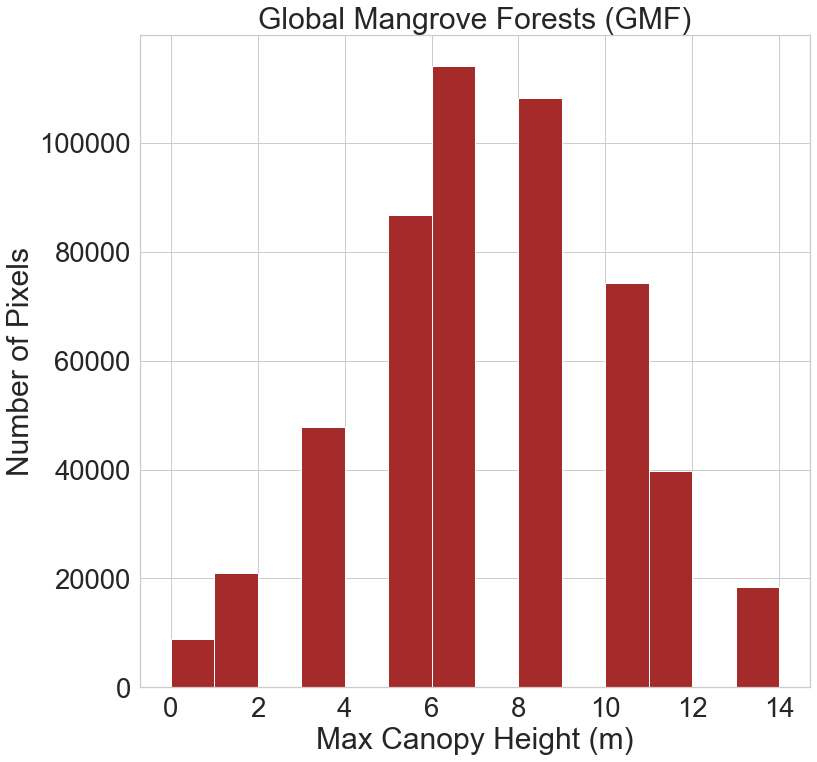

In [136]:
gmf_hmax_hist = hist_manghgt(gmf_hmax, 'Global Mangrove Forests (GMF)')

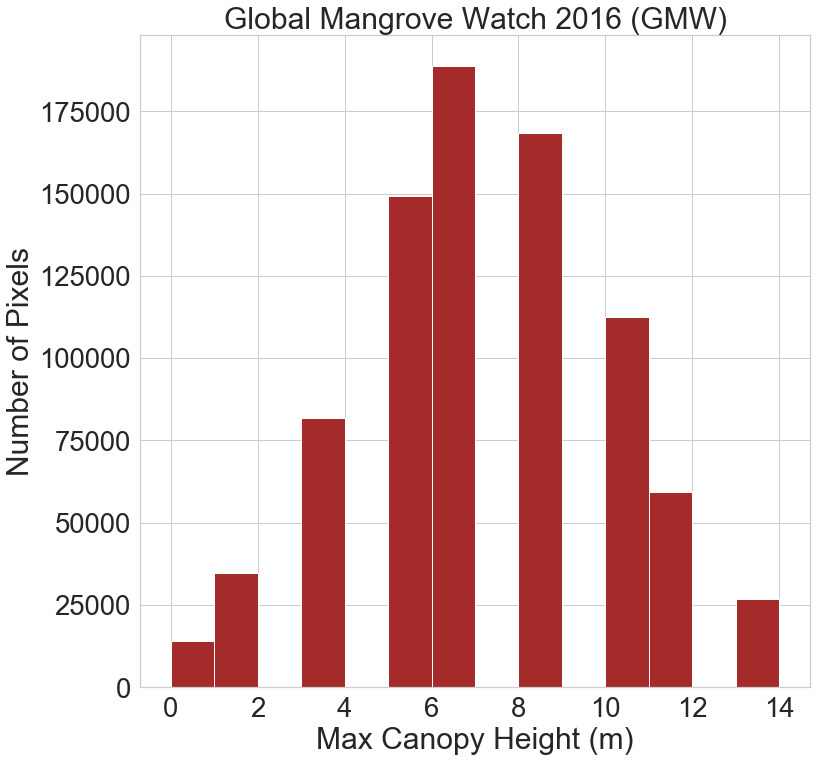

In [137]:
gmw2016_hmax_hist = hist_manghgt(gmw2016_hmax, 'Global Mangrove Watch 2016 (GMW)')

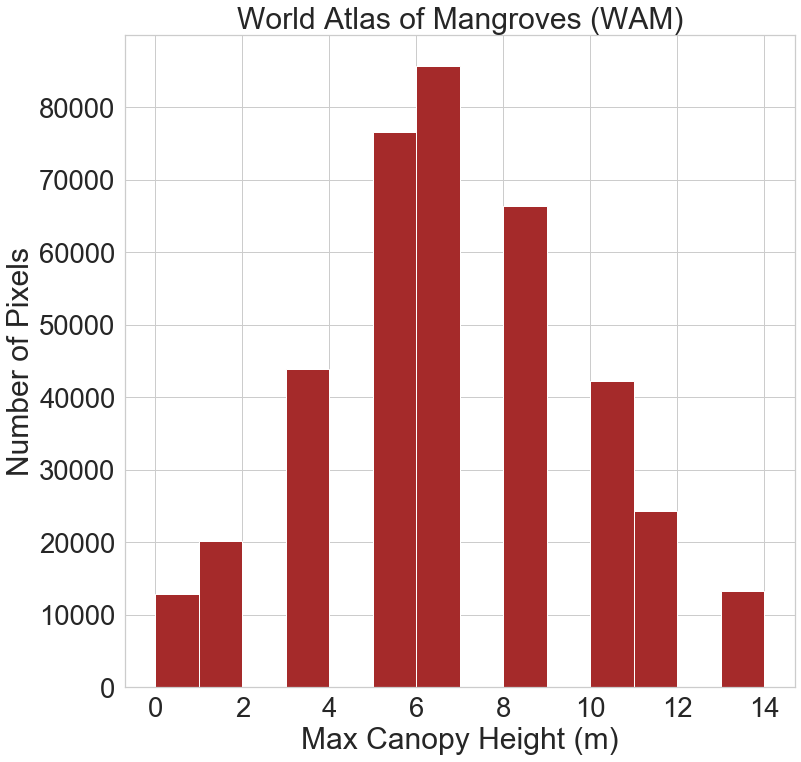

In [138]:
wam_hmax_hist = hist_manghgt(wam_hmax, 'World Atlas of Mangroves (WAM)')

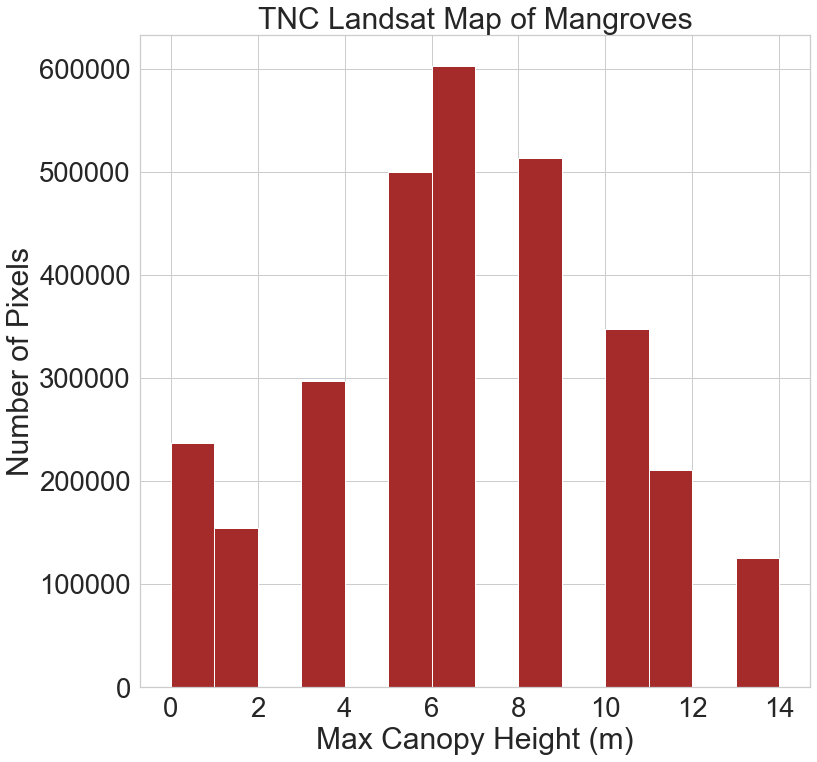

In [139]:
tnc_hmax_hist = hist_manghgt(tnc_hmax, 'TNC Landsat Map of Mangroves')

In [140]:
# See the values in each bin of the histogram
def hist_table(data):
    counts_bins = np.histogram(data, bins=np.arange(15))
    # Print histogram outputs
    print("counts:", counts)
    print("bins:", bins)

In [141]:
# How to see the values in each bin of the histogram
def reclass_maxh(data):
    data_reclass = np.ma.copy(data)
    data_reclass[(data_reclass <= 0) & (data_reclass > -32768)] = 0.5
    data_reclass[data_reclass > 14] = 13.9
    return data_reclass

In [142]:
# Reclassify values outside of the Simard range to show in the histogram
gmf_hmax_reclass = reclass_maxh(gmf_hmax)
gmw2016_hmax_reclass = reclass_maxh(gmw2016_hmax)
wam_hmax_reclass = reclass_maxh(wam_hmax)
tnc_hmax_reclass = reclass_maxh(tnc_hmax)

In [143]:
hist_table(gmf_hmax)
hist_table(gmf_hmax_reclass)
print(np.min(gmf_hmax))
print(np.min(gmf_hmax_reclass))
print(np.max(gmf_hmax))
print(np.max(gmf_hmax_reclass))

counts: [236634 154595      0 296853      0 499911 602682      0 513553      0
 347514 211145      0 125011]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
counts: [236634 154595      0 296853      0 499911 602682      0 513553      0
 347514 211145      0 125011]
bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
-23.758
0.5
59.395
13.9


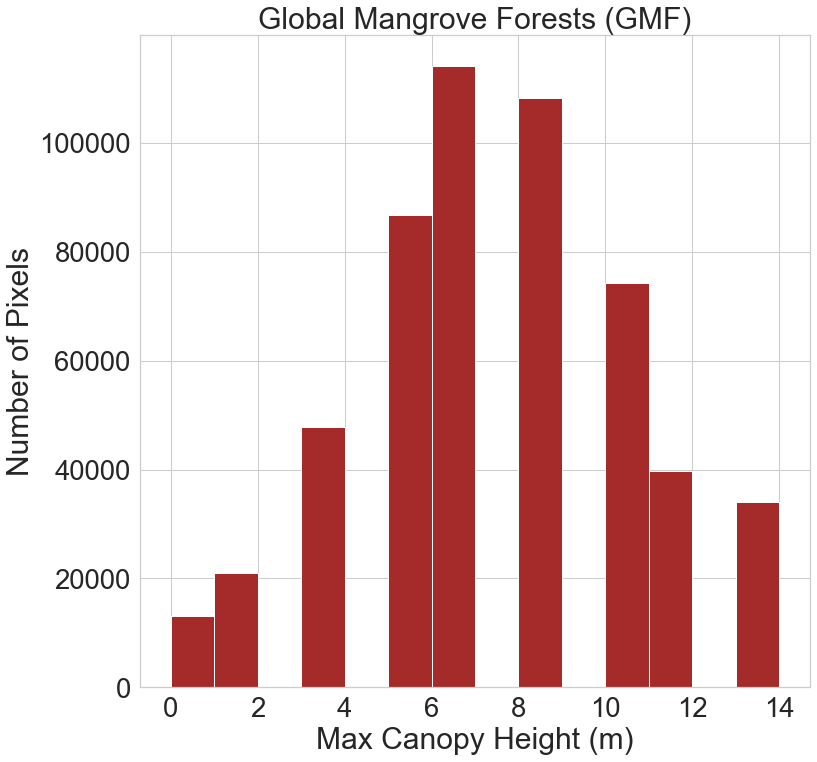

In [144]:
gmf_hmax_hist_reclass = hist_manghgt(gmf_hmax_reclass, 'Global Mangrove Forests (GMF)')

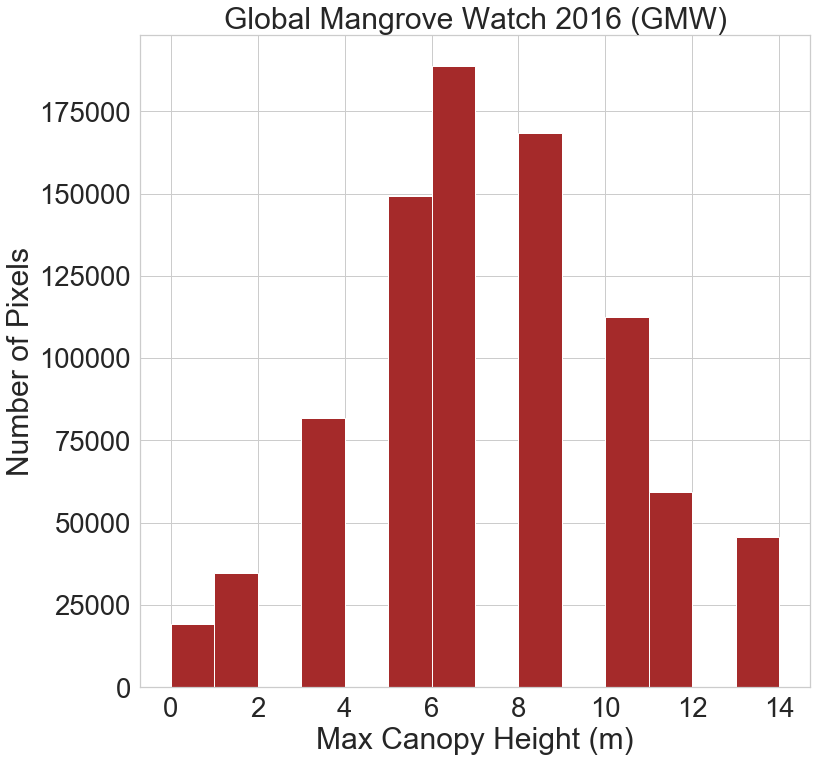

In [145]:
gmw2016_hmax_hist_reclass = hist_manghgt(gmw2016_hmax_reclass, 'Global Mangrove Watch 2016 (GMW)')

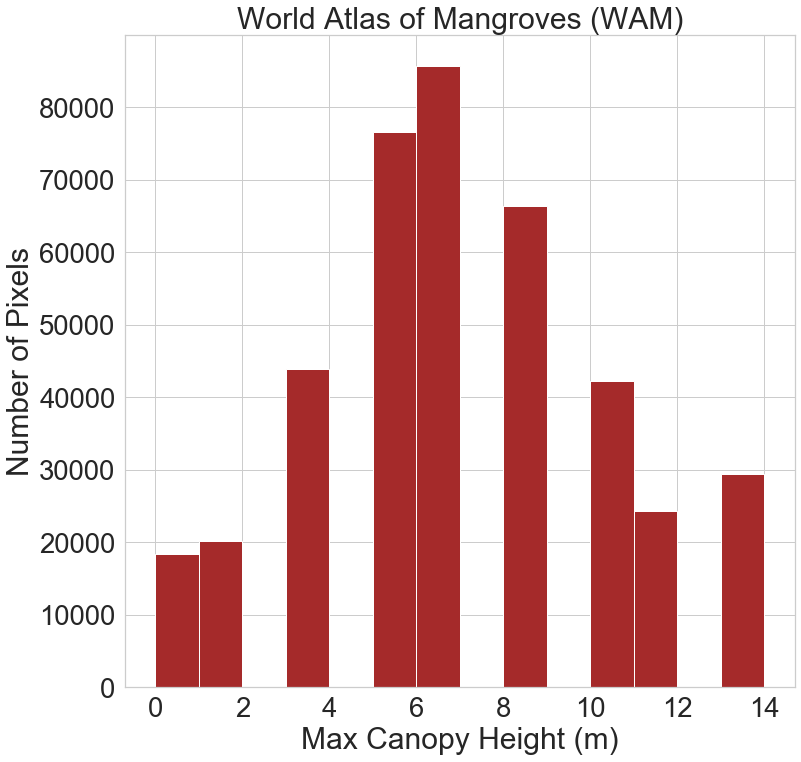

In [146]:
wam_hmax_hist_reclass = hist_manghgt(wam_hmax_reclass, 'World Atlas of Mangroves (WAM)')

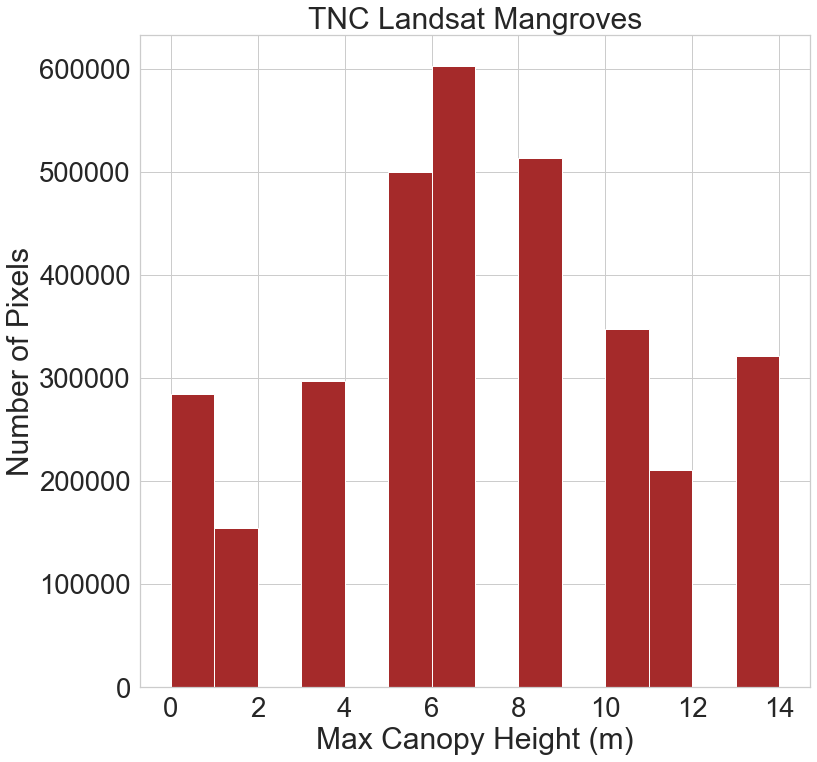

In [154]:
tnc_hmax_hist_reclass = hist_manghgt(tnc_hmax_reclass, 'TNC Landsat Mangroves')

In [153]:
# # Save Figures to PNG files
# gmf_hmax_hist_reclass[0].savefig(os.path.join(graphics_dir,'histreclass_gmf_hgt.png'))
# gmw2016_hmax_hist_reclass[0].savefig(os.path.join(graphics_dir,'histreclass_gmw2016_hgt.png'))
# wam_hmax_hist_reclass[0].savefig(os.path.join(graphics_dir,'histreclass_wam_hgt.png'))
# tnc_hmax_hist_reclass[0].savefig(os.path.join(graphics_dir,'histreclass_tnc_hgt.png'))
# # This does not include the Y-axis label ??